In [35]:
# load in the data
def get_data():
    datafile = "tom_dohmh/src/models/training/data/training_chi_dohmh_tweets.csv"

    data= []
    with open(datafile, 'r') as f:
        for line in f.readlines()[1:]:
            split = line.split(',')
            assert len(split) == 2
            data.append({'tweet':unicode(split[0], 'utf-8'), 'label':int(split[1])})
    return data

In [36]:
import nltk
import twokenize

In [37]:
def doc_freq(og_data):# tokenize
    data = list(og_data)
    for d in data:
        #print d['tweet']
        d['tweet'] = twokenize.tokenizeRawTweetText(d['tweet'])

    # lowercase them all for normalization
    for d in data:
        d['tweet'] = [token.lower() for token in d['tweet']]

    # add in bigrams
    for d in data:
        d['tweet'] += [ d['tweet'][i] + ' ' + d['tweet'][i+1] for i in range(len(d['tweet'])-1)]
    #    d['tweet'] += [ d['tweet'][i] + ' ' + d['tweet'][i+1] + ' ' + d['tweet'][i+2]for i in range(len(d['tweet'])-2)]

    # get common english stopwords. We don't care about those
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english')+['.', ':'])
    stop.remove('i')
    #print "Stopwords: ", stop

    vocab = { term:0 for d in data for term in d['tweet'] if term not in stop}

    # get the document frequency of each term in the vocab
    N = float(len(data)) # number of docs
    for term in vocab.keys():
        for d in data:
            if term in d['tweet']: vocab[term] +=1
        
    rel_freqs = sorted( vocab.items(), key=lambda d:d[1], reverse=True)

    return rel_freqs

In [38]:
data = get_data()
pos = [ d for d in data if d['label'] == 1]
neg = [ d for d in data if d['label'] == 0]

pos_freq = doc_freq(pos)
neg_freq = doc_freq(neg)

In [39]:
for d in zip(pos_freq,neg_freq):
    print d

((u'food', 156), (u'food', 166))
((u'poisoning', 153), (u'poisoning', 160))
((u'food poisoning', 149), (u'food poisoning', 153))
((u'i', 89), (u'i', 72))
((u'got', 44), (u'sick', 67))
((u'got food', 36), (u'got', 24))
((u'think', 28), (u'rt', 23))
((u'i got', 26), (u'?', 19))
((u'think i', 25), (u'poisoning .', 17))
((u'i think', 25), (u'feel', 17))
((u'i have', 20), (u'm', 16))
((u'have food', 18), (u'get', 16))
((u'like', 15), (u'...', 16))
((u'poisoning is', 10), (u'i m', 16))
((u'!', 10), (u'like', 16))
((u'good', 10), (u'!', 15))
((u'day', 10), (u'got food', 12))
((u'sick', 10), (u'better', 11))
((u'poisoning and', 9), (u'had food', 10))
((u'last', 9), (u'get food', 10))
((u'still', 9), (u'go', 10))
((u'm', 8), (u'poisoning is', 9))
((u'has food', 8), (u'with food', 9))
((u'poisoning or', 8), (u'have food', 9))
((u'feel', 8), (u'u', 9))
((u'back', 8), (u'really', 9))
((u'poisoning .', 8), (u'@niallofficial', 9))
((u'i m', 8), (u'today', 8))
((u'i had', 7), (u'i got', 8))
((u'today

In [40]:
search_terms = ["food poisoning", "sick", "vomit", "stomach"]
pvocab = { term:count for term,count in pos_freq }
nvocab = { term:count for term,count in neg_freq }
nvocab['vomit'] = 0
psearch = [(pvocab[term]) for term in search_terms]
nsearch = [(nvocab[term]) for term in search_terms]

In [41]:
for t in search_terms:
    try: 
        p = pvocab[t]
    except KeyError:
        p = 0
    try: 
        n = nvocab[t]
    except KeyError:
        n = 0
    print t, p, n

food poisoning 149 153
sick 10 67
vomit 1 0
stomach 5 4


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

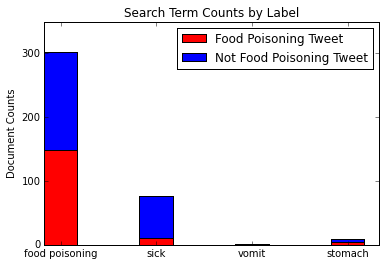

In [42]:
fig = plt.figure()
N = len(search_terms)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, psearch, width, color='r')
p2 = plt.bar(ind, nsearch, width, color='b', bottom=psearch)

plt.ylabel('Document Counts')
plt.title('Search Term Counts by Label')
plt.xticks(ind+width/2., search_terms )
plt.yticks(np.arange(0,len(data),100))
plt.legend( (p1[0], p2[0]), ('Food Poisoning Tweet', 'Not Food Poisoning Tweet') )

plt.savefig('searchterms.pdf')

three plots:

1) rel counts of search terms

2) rel counts of most common terms

3) sentiment counts

In [61]:
# 2) counts of most popular terms
top_fb_terms = [(term, freq) for (term, freq) in pos_freq if term not in search_terms+['food','poisoning']][:25]
# print top_fb_terms
ptop = [(pvocab[term]) for term, freq in top_fb_terms]
print zip (top_fb_terms, ptop)
ntop = [(nvocab[term]) for term, freq in top_fb_terms]

[((u'i', 89), 89), ((u'got', 44), 44), ((u'got food', 36), 36), ((u'think', 28), 28), ((u'i got', 26), 26), ((u'think i', 25), 25), ((u'i think', 25), 25), ((u'i have', 20), 20), ((u'have food', 18), 18), ((u'like', 15), 15), ((u'poisoning is', 10), 10), ((u'!', 10), 10), ((u'good', 10), 10), ((u'day', 10), 10), ((u'poisoning and', 9), 9), ((u'last', 9), 9), ((u'still', 9), 9), ((u'm', 8), 8), ((u'has food', 8), 8), ((u'poisoning or', 8), 8), ((u'feel', 8), 8), ((u'back', 8), 8), ((u'poisoning .', 8), 8), ((u'i m', 8), 8), ((u'i had', 7), 7)]


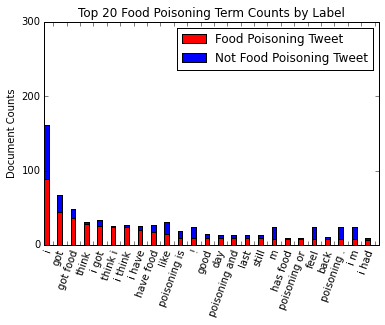

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
N = len(top_fb_terms)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, ptop, width, color='r')
p2 = plt.bar(ind, ntop, width, color='b', bottom=ptop)

term_labels = [str(term) for term, freq in top_fb_terms]
ax.set_ylabel('Document Counts')
ax.set_title('Top 20 Food Poisoning Term Counts by Label')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(term_labels ,rotation=70, ha='right')
ax.set_yticks(np.arange(0,len(data),100))
plt.legend( (p1[0], p2[0]), ('Food Poisoning Tweet', 'Not Food Poisoning Tweet') )

plt.savefig('topterms.pdf')

In [102]:
def get_sentiment_label(text):
    # code from https://www.quora.com/What-is-the-best-way-to-do-Sentiment-Analysis-with-Python-1
    import urllib
    data = urllib.urlencode({"text": unicode(text).encode('utf-8')}) 
    u = urllib.urlopen("http://text-processing.com/api/sentiment/", data)
    import json
    the_page = json.loads(u.read())
    #print the_page
    return the_page['label']

Sentiment analysis using NLTK http://text-processing.com/api/sentiment/

In [117]:
#NOTE: This is an expensive cell to run
data = get_data()
psent = [ get_sentiment_label(d['tweet']) for d in data if d['label']==1]
nsent = [ get_sentiment_label(d['tweet']) for d in data if d['label']==0]

In [134]:
psent_pos = len([s for s in psent if s==u'pos'])
psent_neu = len([s for s in psent if s==u'neutral'])
psent_neg = len([s for s in psent if s==u'neg'])
psent_all = [psent_pos/float(len(psent)), psent_neu/float(len(psent)), psent_neg/float(len(psent))]

nsent_pos = len([s for s in nsent if s==u'pos'])
nsent_neu = len([s for s in nsent if s==u'neutral'])
nsent_neg = len([s for s in nsent if s==u'neg'])
nsent_all = [nsent_pos/float(len(nsent)), nsent_neu/float(len(nsent)), nsent_neg/float(len(nsent))]

pos = [psent_pos/float(len(psent)), nsent_pos/float(len(nsent))]
neu = [psent_neu/float(len(psent)), nsent_neu/float(len(nsent))]
neg = [psent_neg/float(len(psent)), nsent_neg/float(len(nsent))]


print pos[0]+neu[0]+neg[0]
print pos[1]+neu[1]+neg[1]

1.0
1.0


[1 2]


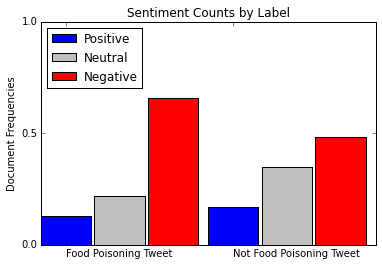

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)
N = 2
ind = np.arange(1,N+1)    # the x locations for the groups
print ind
width = .3      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pos, width, color='b')
p2 = plt.bar(ind+ width+.02, neu, width, color='.75')
p3 = plt.bar(ind+ 2*(width)+.04, neg, width, color='r')


term_labels = [str(term) for term, freq in top_fb_terms]
ax.set_ylabel('Document Frequencies')
ax.set_title('Sentiment Frequencies by Label')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(['Food Poisoning Tweet', 'Not Food Poisoning Tweet'] ,ha='left')#,rotation=, ha='right')
ax.set_yticks([0,.5,1])
plt.legend( (p1[0], p2[0], p3[0]), ('Positive', 'Neutral', 'Negative'), loc=2)

plt.savefig('sentimentbyclass.pdf')